<a href="https://colab.research.google.com/github/Mertuin/lab_project/blob/main/first_steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=111f79401c525af718f00a658d00d7b1ccbf8df71a73fd8c3f88f6b8912e1a99
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib
import copy
from google.colab.patches import cv2_imshow
from filterpy.kalman import KalmanFilter

In [ ]:
!git clone https://github.com/ChiekoN/OpenCV_SSD_MobileNet.git
!cd /content/OpenCV_SSD_MobileNet/model

fatal: destination path 'OpenCV_SSD_MobileNet' already exists and is not an empty directory.


In [ ]:
%cd /content/OpenCV_SSD_MobileNet/model

/content/OpenCV_SSD_MobileNet/model


In [ ]:
# load the COCO class names
with open('object_detection_classes_coco.txt', 'r') as f:
   class_names = f.read().split('\n')

# get a different color array for each of the classes
COLORS = np.random.uniform(0, 255, size=(len(class_names), 3))

In [ ]:
# load the DNN model
model = cv2.dnn.readNet(model='frozen_inference_graph.pb',
                        config='ssd_mobilenet_v2_coco_2018_03_29.pbtxt',framework='TensorFlow')


In [ ]:
# read the image from disk
image = cv2.imread('/content/OpenCV_SSD_MobileNet/images/bunnings.JPG')
image_height, image_width, _ = image.shape
# create blob from image
blob = cv2.dnn.blobFromImage(image=image, size=(300, 300), mean=(104, 117, 123), swapRB=True)
# set the blob to the model
model.setInput(blob)
# forward pass through the model to carry out the detection
output = model.forward()

In [ ]:
print(class_names)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', '']


In [1]:
def detects_to_Z(detects):
    mu = detects[3] + detects[5]/2
    v = detects[4] + detects[6]/2
    S = detects[5] * detects[6]
    r = detects[5] / detects[6] #константа, не оценивается
    return np.array([mu,v,S,r]).T

def detects_to_coords(detects):
    x1, y1 = detects[3], detects[4]
    x2, y2 = detects[3] + detects[5], detects[4] + detects[6]
    return x1,y1,x2,y2

def IOU_match(box_coords, predicted_coords, treshold = 0.4):
    # считаем площадь перекрытия
    w_n = abs

class Kalmanfilt():
    num = 0
    def __init__(self,detects):
        self.detects = detects
        self.filter = KalmanFilter(dim_x=7, dim_z=4)
        self.filter.x[:4] = detects_to_Z(detects)
        #матрица шума измерений: у нас есть 4 параметра, поэтому размерность матрицы 4х4
        self.filter.R = np.diag([2,2,20,2])
        #предполагаем, что объекты перемещаются линейно
        self.filter.F = np.ndarray([1,0,0,0,1,0,0,0],[0,1,0,0,0,1,0],[0,0,1,0,0,0,1],[0,0,0,1,0,0,0],
        [0,0,0,0,1,0,0],[0,0,0,0,0,1,0],[0,0,0,0,0,0,1])
        self.filter.H= np.ndarray([1,0,0,0,0,0,0],
        [0,1,0,0,0,0,0],
          [0,0,1,0,0,0,0],
          [0,0,0,1,0,0,0])
        self.filter.P = np.diag([1,1,10,10,100,100,100])
        self.filter.Q = np.diag([1,1,1,1,5,5,5])
        Kalmanfilt.num += 1

    def predict(self):
        self.filter.predict()

    def update(self,detects):
        self.detects = detects
        self.filter.update(detects_to_Z(detects))


1.0
1.0
1.0
51.0
64.0


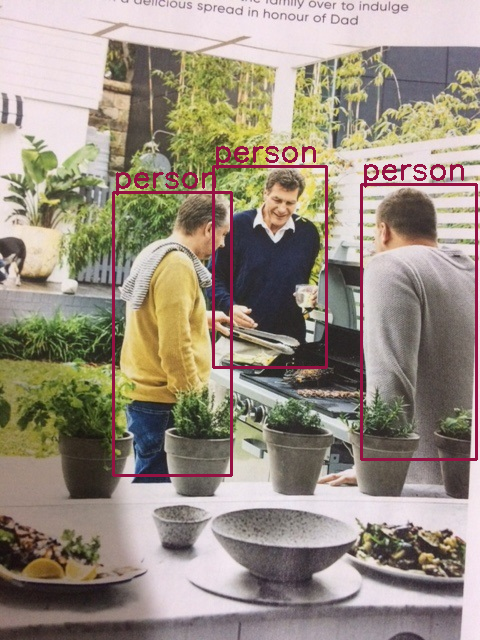

In [ ]:
for detection in output[0, 0, :, :]:
   # extract the confidence of the detection
   confidence = detection[2]
   # draw bounding boxes only if the detection confidence is above...
   # ... a certain threshold, else skip
   if confidence > .4:
       # get the class id
       class_id = detection[1]
       print(class_id)
       # map the class id to the class
       if int(class_id) == 1.0:
          class_name = class_names[int(class_id)-1]
          color = COLORS[int(class_id)]
          # get the bounding box coordinates
          box_x = detection[3] * image_width
          box_y = detection[4] * image_height
          # get the bounding box width and height
          box_width = detection[5] * image_width
          box_height = detection[6] * image_height
          # draw a rectangle around each detected object
          cv2.rectangle(image, (int(box_x), int(box_y)), (int(box_width), int(box_height)), color, thickness=2)
          # put the FPS text on top of the frame
          cv2.putText(image, class_name, (int(box_x), int(box_y - 5)), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

cv2_imshow(image)
cv2.imwrite('image_result.jpg', image)
cv2.waitKey(0)
cv2.destroyAllWindows()